The probability of heads is 0.52. According to the Kelly criterion,
we should bet 4.0% of our money on heads every time.


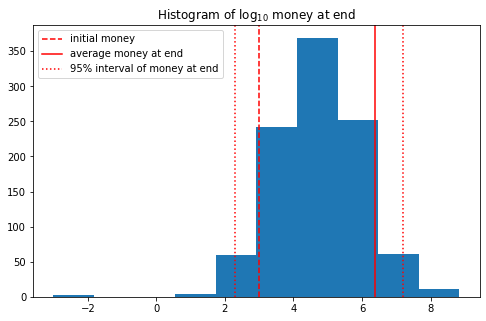

Results after 1000 trials
 * 95% interval of money at end: [196.9, 15959841.8]
 * Average money at end : 2445726.7


In [1]:
import numpy as np
import matplotlib.pyplot as plt


# We start with $1000.
initial_money = 1000

# We get to place at most 5000 bets. It might be fewer if we go broke.
max_bets = 5000

# The coin will come up heads with probability 0.52 so we always bet heads and
# have a 52% chance of winning.
prob_win = 0.52

# How many times to run the betting game. We are running the game many times
# in order to get a distribution over results.
trials = 1000


def play_game(prob_win, max_bets, bet_fraction, initial_money, trials,
              smallest_unit=1):
    '''
    Implement the coin flip game where we place a bet based on `bet_fraction`
    each time and win `prob_win` of the time. We can play for at most `max_bets`
    rounds or until we run out of money, starting from `initial_money`. All bets
    around rounded to `smallest_unit` and we can also not bet less than this
    much money. We repeat the game `trials` times.

    This code is optimized using NumPy arrays.
    '''
    money = np.full(trials, initial_money, dtype=float)
    for bet in range(max_bets):

        # Update only those entries where we still have enough money to bet
        index = np.where(money >= smallest_unit)[0]
        if len(index) == 0:
            break
        
        # Calculate the bet size, rounded to the nearest `smallest_unit`
        bet_size = smallest_unit * np.maximum(
            1, (bet_fraction * money[index] / smallest_unit + 0.5).astype(int))

        money[index] = np.where(
            np.random.uniform(0, 1, size=len(index)) < prob_win,
            money[index] + bet_size,
            money[index] - bet_size)

    return money


# Try out the Kelly ratio for placing bets
kelly_fraction = 2 * prob_win - 1
print(
    f'The probability of heads is {prob_win:.2f}. According to the Kelly'
    f' criterion,\nwe should bet {100*kelly_fraction:.1f}% of our money on heads'
    f' every time.')

# Play the game lots of times
results = play_game(prob_win, max_bets, kelly_fraction, initial_money, trials)
results += 1e-3  # We add a tiny amount to avoid zeros since we take logs below

# Compute and plot statistics of the results
expected_value = np.mean(results)
interval_95 = np.percentile(results, (2.5, 97.5))

plt.figure(figsize=(8, 5))
plt.hist(np.log10(results))
plt.axvline(np.log10(initial_money), color='red', linestyle='--',
            label='initial money')
plt.axvline(np.log10(expected_value), color='red', linestyle='-',
            label='average money at end')
plt.axvline(np.log10(interval_95[0]), color='red', linestyle=':')
plt.axvline(np.log10(interval_95[1]), color='red', linestyle=':',
            label='95% interval of money at end')
plt.title(r'Histogram of $\log_{10}$ money at end')
plt.legend()
plt.show()

print(f'Results after {trials} trials')
print(f' * 95% interval of money at end: [{interval_95[0]:.1f}, {interval_95[1]:.1f}]')
print(f' * Average money at end : {expected_value:.1f}')

In [2]:
bet_fractions = np.linspace(0.01, 0.15, 15)

all_results = np.empty((len(bet_fractions), trials), dtype=float)
for i, bet_fraction in enumerate(bet_fractions):
    all_results[i] = play_game(prob_win, max_bets, bet_fraction, initial_money,
                               trials)

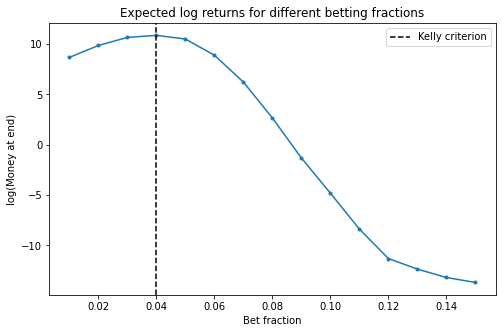

In [3]:
# Plot log final money

plt.figure(figsize=(8, 5))
plt.title('Expected log returns for different betting fractions')
plt.xlabel('Bet fraction')
plt.ylabel('log(Money at end)')
plt.plot(bet_fractions, np.mean(np.log(all_results + 1e-6), axis=1), '.-')
plt.axvline(2*prob_win-1, color='black', linestyle='--', label='Kelly criterion')
plt.legend()
plt.show()

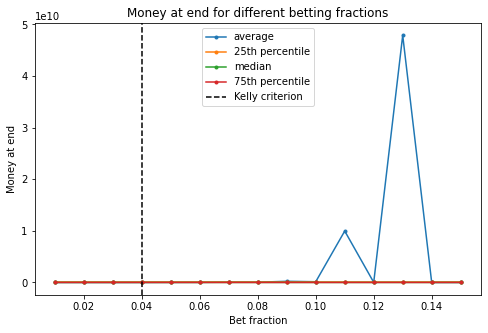

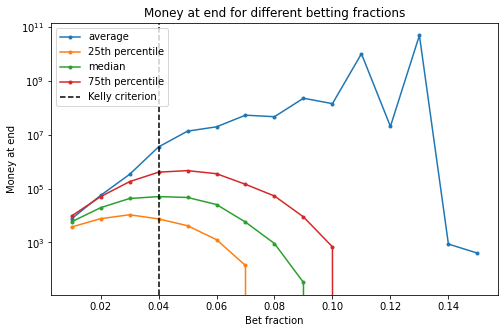

In [4]:
# Plot percentiles and average of final money
# Plot percentiles and average of final money

plt.figure(figsize=(8, 5))
plt.title('Money at end for different betting fractions')
plt.xlabel('Bet fraction')
plt.ylabel('Money at end')

plt.plot(bet_fractions, np.mean(all_results, axis=1), '.-', label='average')
plt.plot(bet_fractions, np.percentile(all_results, 25, axis=1), '.-', label='25th percentile')
plt.plot(bet_fractions, np.median(all_results, axis=1), '.-', label='median')
plt.plot(bet_fractions, np.percentile(all_results, 75, axis=1), '.-', label='75th percentile')

plt.axvline(2*prob_win-1, color='black', linestyle='--', label='Kelly criterion')
plt.legend()

plt.figure(figsize=(8, 5))
plt.title('Money at end for different betting fractions')
plt.xlabel('Bet fraction')
plt.ylabel('Money at end')

plt.semilogy(bet_fractions, np.mean(all_results, axis=1), '.-', label='average')
plt.semilogy(bet_fractions, np.percentile(all_results, 25, axis=1), '.-', label='25th percentile')
plt.semilogy(bet_fractions, np.median(all_results, axis=1), '.-', label='median')
plt.semilogy(bet_fractions, np.percentile(all_results, 75, axis=1), '.-', label='75th percentile')

plt.axvline(2*prob_win-1, color='black', linestyle='--', label='Kelly criterion')
plt.legend()
plt.show()

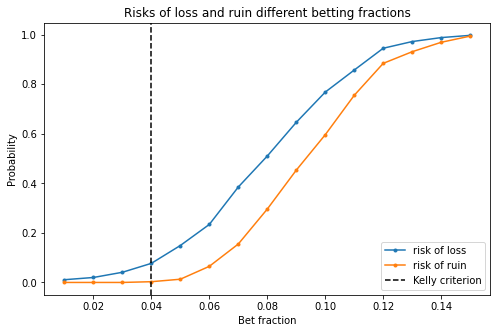

In [5]:
# Plot risk of loss and risk of ruin

plt.figure(figsize=(8, 5))
plt.title('Risks of loss and ruin different betting fractions')
plt.xlabel('Bet fraction')
plt.ylabel('Probability')

plt.plot(bet_fractions, np.mean(all_results < initial_money, axis=1), '.-', label='risk of loss')
plt.plot(bet_fractions, np.mean(all_results < 1, axis=1), '.-', label='risk of ruin')

plt.axvline(2*prob_win-1, color='black', linestyle='--', label='Kelly criterion')
plt.legend()
plt.show()